In [4]:
from specializeGraph import *
from matplotlib import pyplot as plt
import networkx as nx

In [ ]:
i = 1
sizes = []
edges = []

while i <= 10000:
    G = randomGraph(5,stronglyCon=True,base=False)
    numNodes = G.shape[0]
    baseSize = 1
    
    while numNodes <= 300:
        base = np.random.choice(range(numNodes),size=baseSize,replace=False)
        
        try:
            G = specializeGraph(G,list(base))
        
        except Exception:
            pass
        
        numNodes = G.shape[0]
        baseSize = int(numNodes*.9)
        
        if numNodes >= 240 and numNodes < 300:
            grow = True
            count = 0
            
            while grow:
                base = np.random.choice(range(numNodes),size=baseSize,replace=False)
                
                try:
                    H = specializeGraph(G,list(base))
                except Exception:
                    pass
                
                cycleNumNodes = H.shape[0]
                
                if cycleNumNodes <= 350 and cycleNumNodes >= 300:
                    grow = False
                    numNodes = cycleNumNodes
                    G = H
                    
                if count >= 3:
                    grow = False

                count += 1
            
        
    if numNodes <= 350:
        np.savetxt("specNetw"+str(i)+".csv", G, delimiter=",",fmt='%1e')
        sizes.append(G.shape[0])
        edges.append(np.sum(G))
        i += 1
    

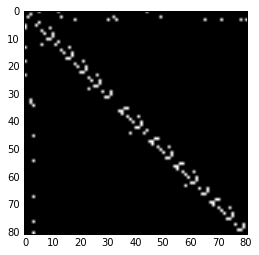

In [60]:
S = specializeGraph(specializeGraph(G,[2,3,4]),[4,10,12,2])
plt.imshow(S,cmap='gray')
plt.show()

In [18]:
from scipy import sparse

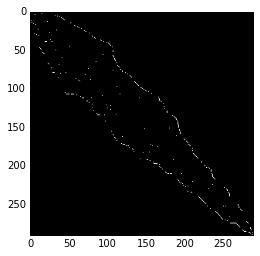

In [19]:
A = sparse.csc_matrix(G)
permu = sparse.csgraph.reverse_cuthill_mckee(A)
Anew = A[permu,:]
Anew = Anew[:,permu]
plt.imshow(Anew.toarray(),cmap='gray')

In [30]:
import networkx as nx

In [95]:
A = np.loadtxt(open("specRandNets/specNetw800.csv",'r'),delimiter=',')

In [96]:
H = nx.DiGraph(A)
nx.write_graphml(H,'so.graphml')

In [13]:
f = open('samples/celegans_samp_ 1 .csv','rb')
E = np.fromfile(f)
G = nx.read_edgelist(f,create_using=nx.DiGraph())

In [42]:
def getA(i):
    f = open('samples/celegans_samp_ '+ str(i) +' .csv','rb')
    l = f.read().split('\n')
    l = [s.split(',') for s in l[1:-1]]
    l = [(int(s[0]),int(s[1])) for s in l]
    G = nx.DiGraph(l)
    return nx.adjacency_matrix(G).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0